In [1]:
#import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy
#import API key
from config import api_key

In [2]:
#set file destination 
output_data_file = "output_data/cities_2022.csv"


In [3]:
#set lat and long range when finding the lists of cities
lat_range = (-90, 90)
lng_range = (-180, 180)

In [4]:
#setting each response we get back from api to a list 
lat_lngs = []
temp_responses = []
cities = []
hum_responses = []
cloud_responses = []
wind_speed_res = []
city_id_responses = []
country_responses = []
lat_lng_responses = []

#Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

 #Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
#If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#len(cities)
cities


['port alfred',
 'cape town',
 'grand river south east',
 'hobart',
 'khatanga',
 'ilulissat',
 'belushya guba',
 'mataura',
 'guerrero negro',
 'laguna',
 'college',
 'hermanus',
 'kavieng',
 'henties bay',
 'severo-kurilsk',
 'rikitea',
 'busselton',
 'bluff',
 'christchurch',
 'puerto ayora',
 'east london',
 'albany',
 'nizhneyansk',
 'teseney',
 'saint-philippe',
 'kushima',
 'saskylakh',
 'new norfolk',
 'ulaanbaatar',
 'airai',
 'port elizabeth',
 'katangi',
 'sibu',
 'berlevag',
 'gat',
 'mys shmidta',
 'nikolskoye',
 'mount gambier',
 'castro',
 'ballina',
 'cidreira',
 'yantal',
 'okhotsk',
 'luwingu',
 'vardo',
 'ushuaia',
 'attawapiskat',
 'karratha',
 'kavaratti',
 'mersing',
 'half moon bay',
 'garowe',
 'cayenne',
 'butaritari',
 'batemans bay',
 'kodiak',
 'soyo',
 'rosetta',
 'dunmore town',
 'kapaa',
 'vestmannaeyjar',
 'carnarvon',
 'tateyama',
 'quatre cocos',
 'longyearbyen',
 'hofn',
 'vaini',
 'lac du bonnet',
 'dvinskoy',
 'bolungarvik',
 'padang',
 'chokurdakh'

In [5]:
#create a data frame from the cities list
#each column is just a list
cities_df = pd.DataFrame({
    "Temp_max": [],
    "Humidity": [],
    " Cloudiness ": [], 
    "wind_speed": [],
    "city_id": [],
    "country_code": [],
    "long": [],
    "lat": []
})
#view blank dataframe    
cities_df.head()
#assign list cities to column name ['City_name']
#add cities list as a column 
cities_df['City_name'] = cities
    
#check how many cities we have in the list    
#cities_df.head()
len(cities_df.City_name)


584

In [6]:
#partial url 
units = 'Imperial'
url = "http://api.openweathermap.org/data/2.5/weather?"
#query_url = f"{url}appid={api_key}&q={cities}&units={units}"
query_url = f"{url}appid={api_key}&units={units}&q="



In [7]:
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=17243731ef2770efaeedd6b49354cdf8&units=Imperial&q=


In [8]:
# this is a test to confirm we are receiving correct data from the api--these test cities are not the same as those used in the mass
#api pull-scale 10 cities- if we run again-would pull from mass list of 500+ cities
import time
temp_responses = []

#for loop through city list and retreive temp data for the lat
for city in cities[0:1]:
    weather_data = requests.get(query_url + city).json()
    time.sleep(2)
    temp_responses.append(weather_data)
    print(weather_data)
    
    try:
        print(f"The temp of {city} is {weather_data['main']['temp']}")
    except (KeyError):
        print("Oops, something is missing.Skipping")
    print("------------")
    #print(f"The temp of {city} is {weather_data['main']['temp_max']}")
    
    


#weather_response = requests.get(query_url)
#weather_json = weather_response.json()


#units = "metric"
#url = "http://api.openweathermap.org/data/2.5/weather?"
#query_url = f"{url}appid={api_key}&units={units}&q="

{'coord': {'lon': 26.891, 'lat': -33.5906}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04n'}], 'base': 'stations', 'main': {'temp': 64.87, 'feels_like': 64.99, 'temp_min': 64.87, 'temp_max': 64.87, 'pressure': 1015, 'humidity': 84, 'sea_level': 1015, 'grnd_level': 1013}, 'visibility': 10000, 'wind': {'speed': 7.72, 'deg': 260, 'gust': 8.03}, 'clouds': {'all': 74}, 'dt': 1645497872, 'sys': {'country': 'ZA', 'sunrise': 1645502069, 'sunset': 1645549067}, 'timezone': 7200, 'id': 964432, 'name': 'Port Alfred', 'cod': 200}
The temp of port alfred is 64.87
------------


In [9]:
# this is a test to confirm we are receiving correct data from the api--these test cities are not the same as those used in the mass
#api pull--scale 10 cities- if we run again-would pull from mass list of 500+ cities

for city in cities[0:10]:
    
    weather_data2 = requests.get(query_url + city).json()
    hum_responses.append(weather_data2)
    try:
        print(f"The humidity of {city} is {weather_data2['main']['humidity']}")
    except (KeyError):
        print("Oops, something is missing.Skipping")
    print("------------")   
    time.sleep(2)
          
          
          
          

    
    

The humidity of port alfred is 84
------------
The humidity of cape town is 75
------------
Oops, something is missing.Skipping
------------
The humidity of hobart is 36
------------
The humidity of khatanga is 88
------------
The humidity of ilulissat is 65
------------
Oops, something is missing.Skipping
------------
The humidity of mataura is 98
------------
The humidity of guerrero negro is 62
------------
The humidity of laguna is 62
------------


In [10]:
# this is a test to confirm we are receiving correct data from the api--these test cities are not the same as those used in the mass
#api pull--scale 10 cities- if we run again-would pull from mass list of 500+ cities

for city in cities[0:10]:
    weather_data3 = requests.get(query_url + city).json()
    cloud_responses.append(weather_data3)
    try:
        print(f"The cloudiness of {city} is {weather_data3['clouds']['all']} percent")
    except (KeyError):
        print("Oops, something is missing.Skipping")
    print("------------")            
    time.sleep(2)

The cloudiness of port alfred is 74 percent
------------
The cloudiness of cape town is 7 percent
------------
Oops, something is missing.Skipping
------------
The cloudiness of hobart is 6 percent
------------
The cloudiness of khatanga is 100 percent
------------
The cloudiness of ilulissat is 20 percent
------------
Oops, something is missing.Skipping
------------
The cloudiness of mataura is 100 percent
------------
The cloudiness of guerrero negro is 10 percent
------------
The cloudiness of laguna is 40 percent
------------


In [11]:
# this is a test to confirm we are receiving correct data from the api--these test cities are not the same as those used in the mass
#api pull--scale 10 cities- if we run again-would pull from mass list of 500+ cities

for city in cities[0:10]:
    weather_data4 = requests.get(query_url + city).json()
    wind_speed_res.append(weather_data4)
    try:
        print(f"The wind speed of {city} is {weather_data4['wind']['speed']}")
    except (KeyError):
        print("Oops, something is missing.Skipping")
    print("------------")   
    time.sleep(2)

The wind speed of port alfred is 7.72
------------
The wind speed of cape town is 1.99
------------
Oops, something is missing.Skipping
------------
The wind speed of hobart is 1.99
------------
The wind speed of khatanga is 4.43
------------
The wind speed of ilulissat is 9.22
------------
Oops, something is missing.Skipping
------------
The wind speed of mataura is 4.94
------------
The wind speed of guerrero negro is 14.43
------------
The wind speed of laguna is 10.36
------------


In [12]:
# this is a test to confirm we are receiving correct data from the api--these test cities are not the same as those used in the mass
#api pull--scale 10 cities- if we run again-would pull from mass list of 500+ cities

for city in cities[0:10]:
    weather_data5 = requests.get(query_url + city).json()
    city_id_responses.append(weather_data5)
    try:
        print(f"The city id of {city} is {weather_data5['id']}")
    except (KeyError):
        print("Oops, something is missing.Skipping")
    print("------------")   
              
    time.sleep(2)

The city id of port alfred is 964432
------------
The city id of cape town is 3369157
------------
Oops, something is missing.Skipping
------------
The city id of hobart is 2163355
------------
The city id of khatanga is 2022572
------------
The city id of ilulissat is 3423146
------------
Oops, something is missing.Skipping
------------
The city id of mataura is 6201424
------------
The city id of guerrero negro is 4021858
------------
The city id of laguna is 5364271
------------


In [13]:
# this is a test to confirm we are receiving correct data from the api--these test cities are not the same as those used in the mass
#api pull--scale 10 cities- if we run again-would pull from mass list of 500+ cities

for city in cities[0:10]:
    weather_data6 = requests.get(query_url + city).json()
    country_responses.append(weather_data6)
    try:
        print(f"The country code of {city} is {weather_data6['sys']['country']}")
    except (KeyError):
        print("Oops, something is missing.Skipping")
    print("------------")   
              
    time.sleep(2)

The country code of port alfred is ZA
------------
The country code of cape town is ZA
------------
Oops, something is missing.Skipping
------------
The country code of hobart is AU
------------
The country code of khatanga is RU
------------
The country code of ilulissat is GL
------------
Oops, something is missing.Skipping
------------
The country code of mataura is NZ
------------
The country code of guerrero negro is MX
------------
The country code of laguna is US
------------


In [14]:
# this is a test to confirm we are receiving correct data from the api--these test cities are not the same as those used in the mass
#api pull--scale 10 cities- if we run again-would pull from mass list of 500+ cities

for city in cities[0:10]:
    weather_data7 = requests.get(query_url + city).json()
    #lats = weather_data7['coord']['lat']
    lat_lng_responses.append(weather_data7)
    try:
        print(f"The latitude of {city} is {weather_data7['coord']['lat']}")
    except (KeyError):
        print("Oops, something is missing.Skipping")
    
    print("------------")   
              
    time.sleep(2)
    

The latitude of port alfred is -33.5906
------------
The latitude of cape town is -33.9258
------------
Oops, something is missing.Skipping
------------
The latitude of hobart is -42.8794
------------
The latitude of khatanga is 71.9667
------------
The latitude of ilulissat is 69.2167
------------
Oops, something is missing.Skipping
------------
The latitude of mataura is -46.1927
------------
The latitude of guerrero negro is 27.9769
------------
The latitude of laguna is 38.421
------------


In [15]:
# due to the limits of our API subscription, I m only running this once. The data from the earlier tests was using a list of 10 items
#this uses a full list 
# use iterrows to iterate through pandas dataframe
for index, row in cities_df.iterrows():

    # get cityname from df
    city_name1 = row['City_name']

  

    # assemble url and make API request
    print(f"Retrieving Results for Index {index}: {city_name1}.")
    
    weather_data7 = requests.get(query_url + city_name1).json()
    # extract results
    try:
        results_lat = weather_data7['coord']['lat']    
        country_code = weather_data7['sys']['country']
        results_lng = weather_data7['coord']['lon']
        city_id = weather_data7['id']
        wind_speed = weather_data7['wind']['speed']
        clouds = weather_data7['clouds']['all']
        humidity = weather_data7['main']['humidity']
        max_temp = weather_data7['main']['temp']
    
    #try:
        #Latitude
        #print(f"The latitude of {city_name1} is {results_lat}")
    
    
    
    #temperature

        #print(f"The temp of {city_name1} is {max_temp}")
 
    #humidity
        #print(f"The humidity of {city_name1} is {humidity}")
    
    #cloudiness
        #print(f"The cloudiness of {city_name1} is {clouds} percent")
    
    #windspeed
        #print(f"The wind speed of {city_name1} is {wind_speed}")
   
    #city id
        #print(f"The city id of {city_name1} is {city_id}")
   
    #country code
        #print(f"The country code of {city_name1} is {country_code}")
     
    
        cities_df.loc[index, 'lat'] = results_lat
        cities_df.loc[index, 'country_code'] = country_code
        cities_df.loc[index, 'long'] = results_lng
        cities_df.loc[index, 'city_id'] = city_id
        cities_df.loc[index, 'wind_speed'] = wind_speed
        cities_df.loc[index, 'Cloudiness'] = clouds
        cities_df.loc[index, 'Humidity'] = humidity
        cities_df.loc[index, 'Temp_max'] = max_temp
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
    print("------------")
    time.sleep(2)

Retrieving Results for Index 0: port alfred.
------------
Retrieving Results for Index 1: cape town.
------------
Retrieving Results for Index 2: grand river south east.
Missing field/result... skipping.
------------
Retrieving Results for Index 3: hobart.
------------
Retrieving Results for Index 4: khatanga.
------------
Retrieving Results for Index 5: ilulissat.
------------
Retrieving Results for Index 6: belushya guba.
Missing field/result... skipping.
------------
Retrieving Results for Index 7: mataura.
------------
Retrieving Results for Index 8: guerrero negro.
------------
Retrieving Results for Index 9: laguna.
------------
Retrieving Results for Index 10: college.
------------
Retrieving Results for Index 11: hermanus.
------------
Retrieving Results for Index 12: kavieng.
------------
Retrieving Results for Index 13: henties bay.
------------
Retrieving Results for Index 14: severo-kurilsk.
------------
Retrieving Results for Index 15: rikitea.
------------
Retrieving Resu

------------
Retrieving Results for Index 138: olinda.
------------
Retrieving Results for Index 139: sinnamary.
------------
Retrieving Results for Index 140: jamestown.
------------
Retrieving Results for Index 141: bilma.
------------
Retrieving Results for Index 142: haines junction.
------------
Retrieving Results for Index 143: muswellbrook.
------------
Retrieving Results for Index 144: saldanha.
------------
Retrieving Results for Index 145: zaraza.
------------
Retrieving Results for Index 146: port-gentil.
------------
Retrieving Results for Index 147: avarua.
------------
Retrieving Results for Index 148: leningradskiy.
------------
Retrieving Results for Index 149: lebu.
------------
Retrieving Results for Index 150: paoua.
------------
Retrieving Results for Index 151: novyy urgal.
------------
Retrieving Results for Index 152: kolyshley.
------------
Retrieving Results for Index 153: mar del plata.
------------
Retrieving Results for Index 154: luanda.
------------
Retrie

Retrieving Results for Index 276: mogadishu.
------------
Retrieving Results for Index 277: sishui.
------------
Retrieving Results for Index 278: kishtwar.
------------
Retrieving Results for Index 279: tongzhou.
------------
Retrieving Results for Index 280: kontagora.
------------
Retrieving Results for Index 281: lake havasu city.
------------
Retrieving Results for Index 282: ust-uda.
------------
Retrieving Results for Index 283: baker city.
------------
Retrieving Results for Index 284: ostrovnoy.
------------
Retrieving Results for Index 285: talavera de la reina.
------------
Retrieving Results for Index 286: chuy.
------------
Retrieving Results for Index 287: marsa matruh.
------------
Retrieving Results for Index 288: abay.
------------
Retrieving Results for Index 289: yate.
------------
Retrieving Results for Index 290: parczew.
------------
Retrieving Results for Index 291: tiksi.
------------
Retrieving Results for Index 292: orlik.
------------
Retrieving Results for I

------------
Retrieving Results for Index 414: adrar.
------------
Retrieving Results for Index 415: ahuimanu.
------------
Retrieving Results for Index 416: liverpool.
------------
Retrieving Results for Index 417: san felipe.
------------
Retrieving Results for Index 418: heihe.
------------
Retrieving Results for Index 419: muroto.
------------
Retrieving Results for Index 420: saint combs.
Missing field/result... skipping.
------------
Retrieving Results for Index 421: jinka.
------------
Retrieving Results for Index 422: quetzaltepec.
Missing field/result... skipping.
------------
Retrieving Results for Index 423: freetown.
------------
Retrieving Results for Index 424: kirakira.
------------
Retrieving Results for Index 425: barentsburg.
Missing field/result... skipping.
------------
Retrieving Results for Index 426: mount isa.
------------
Retrieving Results for Index 427: amderma.
Missing field/result... skipping.
------------
Retrieving Results for Index 428: kununurra.
------

Retrieving Results for Index 551: ziro.
------------
Retrieving Results for Index 552: nabire.
------------
Retrieving Results for Index 553: shirokiy.
------------
Retrieving Results for Index 554: santa fe.
------------
Retrieving Results for Index 555: tigil.
------------
Retrieving Results for Index 556: verkhoyansk.
------------
Retrieving Results for Index 557: jacqueville.
------------
Retrieving Results for Index 558: bhimunipatnam.
------------
Retrieving Results for Index 559: caravelas.
------------
Retrieving Results for Index 560: gwanda.
------------
Retrieving Results for Index 561: batagay.
------------
Retrieving Results for Index 562: totolapan.
------------
Retrieving Results for Index 563: palmer.
------------
Retrieving Results for Index 564: quelimane.
------------
Retrieving Results for Index 565: khuzdar.
------------
Retrieving Results for Index 566: urdzhar.
Missing field/result... skipping.
------------
Retrieving Results for Index 567: amapa.
------------
Re

In [16]:
#check out results in the Data- note there is a duplicate cloudiness column that needs removed and the df needs to be rearraged 
cities_df.head(10)


,Temp_max,Humidity,Cloudiness,wind_speed,city_id,country_code,long,lat,City_name,Cloudiness
0,64.87,84.0,NaN,7.72,964432.0,ZA,26.8910,-33.5906,port alfred,74.0
1,62.17,75.0,NaN,1.99,3369157.0,ZA,18.4232,-33.9258,cape town,7.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,grand river south east,NaN
3,70.56,36.0,NaN,1.99,2163355.0,AU,147.3294,-42.8794,hobart,6.0
4,4.53,88.0,NaN,4.43,2022572.0,RU,102.5000,71.9667,khatanga,100.0
5,-2.18,65.0,NaN,9.22,3423146.0,GL,-51.1000,69.2167,ilulissat,20.0
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,belushya guba,NaN
7,49.57,98.0,NaN,4.94,6201424.0,NZ,168.8643,-46.1927,mataura,100.0
8,59.40,62.0,NaN,14.43,4021858.0,MX,-114.0611,27.9769,guerrero negro,10.0
9,51.91,62.0,NaN,10.36,5364271.0,US,-121.4238,38.4210,laguna,40.0


In [17]:
# check the number of cities in the dataframe
len(cities_df.City_name)

584

In [18]:
#drop the duplicate cloudiness column that had no data
clean_df1 = cities_df.drop([cities_df.columns[2]], axis='columns')
clean_df1.head()


,Temp_max,Humidity,wind_speed,city_id,country_code,long,lat,City_name,Cloudiness
0,64.87,84.0,7.72,964432.0,ZA,26.8910,-33.5906,port alfred,74.0
1,62.17,75.0,1.99,3369157.0,ZA,18.4232,-33.9258,cape town,7.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,grand river south east,NaN
3,70.56,36.0,1.99,2163355.0,AU,147.3294,-42.8794,hobart,6.0
4,4.53,88.0,4.43,2022572.0,RU,102.5000,71.9667,khatanga,100.0


In [19]:
#rearrange for aestetics 
clean_df2 = clean_df1[['City_name', 'Temp_max', 'Humidity', 'wind_speed', 'city_id', 'country_code', 'long', 'lat', 'Cloudiness']]
clean_df2.head()

,City_name,Temp_max,Humidity,wind_speed,city_id,country_code,long,lat,Cloudiness
0,port alfred,64.87,84.0,7.72,964432.0,ZA,26.8910,-33.5906,74.0
1,cape town,62.17,75.0,1.99,3369157.0,ZA,18.4232,-33.9258,7.0
2,grand river south east,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,hobart,70.56,36.0,1.99,2163355.0,AU,147.3294,-42.8794,6.0
4,khatanga,4.53,88.0,4.43,2022572.0,RU,102.5000,71.9667,100.0


In [20]:
#drop all rows that have NAN data
final_clean_df = clean_df2.dropna()
final_clean_df.head()


,City_name,Temp_max,Humidity,wind_speed,city_id,country_code,long,lat,Cloudiness
0,port alfred,64.87,84.0,7.72,964432.0,ZA,26.8910,-33.5906,74.0
1,cape town,62.17,75.0,1.99,3369157.0,ZA,18.4232,-33.9258,7.0
3,hobart,70.56,36.0,1.99,2163355.0,AU,147.3294,-42.8794,6.0
4,khatanga,4.53,88.0,4.43,2022572.0,RU,102.5000,71.9667,100.0
5,ilulissat,-2.18,65.0,9.22,3423146.0,GL,-51.1000,69.2167,20.0


In [21]:
#check how many data points we have for cities
len(final_clean_df.City_name)

539

In [22]:
#save file to csv
final_clean_df.to_csv('Final_2_21_2022.csv')

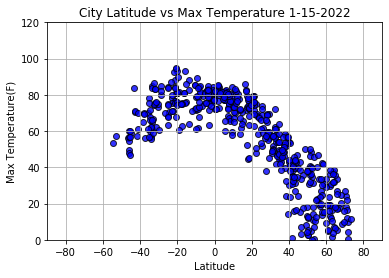

In [23]:
#Temperature (F) vs. Latitude scatter plot
temperature = final_clean_df.Temp_max.to_list()
lat1 = final_clean_df.lat.to_list()

plt.scatter(lat1,
            temperature,
            c="blue",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Urban")

plt.title("City Latitude vs Max Temperature 1-15-2022")
plt.ylabel("Max Temperature(F)")
plt.ylim((0,120))
plt.xlabel("Latitude")
plt.xlim((-90,90))
plt.grid(True)
plt.savefig("City Latitude and Maxtemp.png")

plt.show()

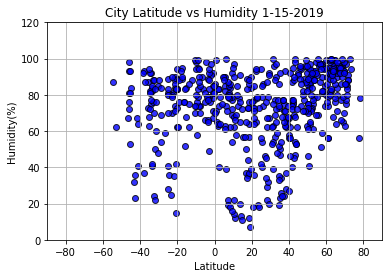

In [24]:
#Humidity (F) vs. Latitude scatter plot
Humidity1 = final_clean_df.Humidity.to_list()
lat1 = final_clean_df.lat.to_list()

plt.scatter(lat1,
            Humidity1,
            c="blue",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Urban")

plt.title("City Latitude vs Humidity 1-15-2019")
plt.ylabel("Humidity(%)")
plt.ylim((0,120))
plt.xlabel("Latitude")
plt.xlim((-90,90))
plt.grid(True)
plt.savefig("City Latitude and humidity.png")

plt.show()

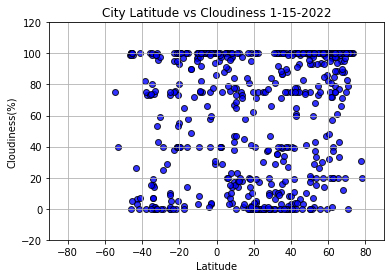

In [25]:
#Cloudiness vs. Latitude scatter plot
Cloudiness1 = final_clean_df.Cloudiness.to_list()
lat1 = final_clean_df.lat.to_list()

plt.scatter(lat1,
            Cloudiness1,
            c="blue",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Urban")

plt.title("City Latitude vs Cloudiness 1-15-2022")
plt.ylabel("Cloudiness(%)")
plt.ylim((-20,120))
plt.xlabel("Latitude")
plt.xlim((-90,90))
plt.grid(True)
plt.savefig("City Latitude and Cloudiness.png")

plt.show()

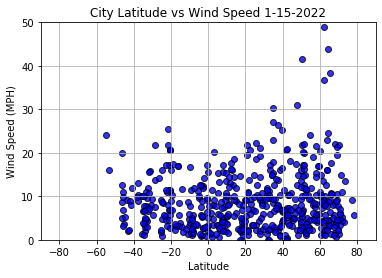

In [26]:
#WindSpeed vs. Latitude scatter plot
windspeed1 = final_clean_df.wind_speed.to_list()
lat1 = final_clean_df.lat.to_list()

plt.scatter(lat1,
            windspeed1,
            c="blue",
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Urban")

plt.title("City Latitude vs Wind Speed 1-15-2022")
plt.ylabel("Wind Speed (MPH)")
plt.ylim((0,50))
plt.xlabel("Latitude")
plt.xlim((-90,90))
plt.grid(True)
plt.savefig("City Latitude and Wind Speed.png")

plt.show()

In [27]:
from datetime import date

today = date.today()
today

datetime.date(2022, 2, 21)

In [28]:


today = date.today()
day = today.day
month = today.month
year = today.year

print(f"today is {month}-{day}-{year}")


today is 2-21-2022


In [29]:
def api_query(cities_df):
    #import dependencies
    import matplotlib.pyplot as plt
    import pandas as pd
    import numpy as np
    import requests
    import time
    from citipy import citipy
    #import API key
    from config import api_key
    from datetime import date
    
    
    # due to the limits of our API subscription, I m only running this once. The data from the earlier tests was using a list of 10 items
    #this uses a full list 
    # use iterrows to iterate through pandas dataframe
    for index, row in cities_df.iterrows():

        # get cityname from df
        city_name1 = row['City_name']



        # assemble url and make API request
        print(f"Retrieving Results for Index {index}: {city_name1}.")

        weather_data = requests.get(query_url + city_name1).json()
        # extract results
        try:
            results_lat = weather_data['coord']['lat']    
            country_code = weather_data['sys']['country']
            results_lng = weather_data['coord']['lon']
            city_id = weather_data['id']
            wind_speed = weather_data['wind']['speed']
            clouds = weather_data['clouds']['all']
            humidity = weather_data['main']['humidity']
            max_temp = weather_data['main']['temp']



            cities_df.loc[index, 'lat'] = results_lat
            cities_df.loc[index, 'country_code'] = country_code
            cities_df.loc[index, 'long'] = results_lng
            cities_df.loc[index, 'city_id'] = city_id
            cities_df.loc[index, 'wind_speed'] = wind_speed
            cities_df.loc[index, 'Cloudiness'] = clouds
            cities_df.loc[index, 'Humidity'] = humidity
            cities_df.loc[index, 'Temp_max'] = max_temp
        except (KeyError, IndexError):
            print("Missing field/result... skipping.")
        print("------------")
        time.sleep(2)
        
    #drop the duplicate cloudiness column that had no data
    clean_df1 = cities_df.drop([cities_df.columns[2]], axis='columns')
    clean_df2 = clean_df1[['City_name', 'Temp_max', 'Humidity', 'wind_speed', 'city_id', 'country_code', 'long', 'lat', 'Cloudiness']]
    final_clean_df = clean_df2.dropna()
    today = date.today()
    day = today.day
    month = today.month
    year = today.year
    
    #save file to csv
    final_clean_df.to_csv(f'data_{month}_{day}_{year}.csv')
    